

---



---


# Gaussian RBF Kernel


---



---
The Gaussian Radial Basis Function (RBF) Kernel, often referred to as the RBF Kernel, is a popular kernel function used in Support Vector Machine (SVM) algorithms for classification and regression tasks. It is defined by the formula:

```
K(a, b) = exp(-γ * ||a - b||^2)
```

Where:
- `K(a, b)` represents the kernel function applied to input vectors `a` and `b`.
- `γ` is a hyperparameter that determines the width of the Gaussian.
- `||a - b||^2` is the squared Euclidean distance between vectors `a` and `b`.

The Gaussian RBF Kernel computes the similarity or "kernelized" distance between two data points in the input space. It measures how much each data point resembles or is related to another data point. This kernel function is capable of capturing complex, nonlinear relationships between data points and is particularly useful when the decision boundary is not easily separable or linearly separable in the original input space.

In SVM, the Gaussian RBF Kernel is often employed when the data is not linearly separable and provides a flexible decision boundary that can adapt to the distribution of the data in a higher-dimensional space. However, it requires careful tuning of the \( \gamma \) hyperparameter to avoid overfitting or underfitting the model.

In this notebook, we will explore the Gaussian RBF Kernel in Support Vector Machines (SVM) using the `make_moons` dataset.

##Import necessary libraries

In [1]:
# Importing  libraries
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


##Load Data


This code generates a synthetic dataset with two moon-shaped clusters and plots it using matplotlib.

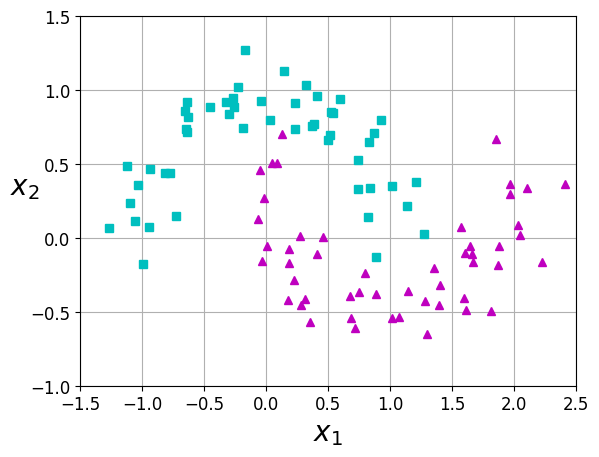

In [2]:
# Importing the make_moons function from sklearn.datasets module, which generates a synthetic moon-shaped dataset.
from sklearn.datasets import make_moons

# Generating a synthetic dataset with 100 samples, noise level of 0.15, and a specific random state.
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Defining a function to plot the dataset with different markers for each class.
def plot_dataset(X, y, axes):
    # Plotting points for class 0 with cyan squares.
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "cs")
    # Plotting points for class 1 with magenta triangles.
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "m^")
    # Setting the axis limits based on the provided axes parameter.
    plt.axis(axes)
    # Enabling grid lines on both major and minor ticks.
    plt.grid(True, which='both')
    # Labeling x-axis with LaTeX-style formatting.
    plt.xlabel(r"$x_1$", fontsize=20)
    # Labeling y-axis with LaTeX-style formatting, and rotating it to be horizontal.
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

# Calling the plot_dataset function to plot the generated dataset.
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# Displaying the plot.
plt.show()


##Model Building

This code defines and trains a pipeline for an SVM classifier with an RBF kernel using Scikit-learn.

In [3]:

# Defining a pipeline for RBF Kernel SVM classifier
rbf_kernel_svm_clf = Pipeline([
    # Step 1: Feature scaling using StandardScaler
    ("scaler", StandardScaler()),

    # Step 2: SVM classifier with RBF Kernel, gamma=5, and C=0.001
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

# Fitting the classifier to the data
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

This function plots the decision boundary and decision contours of a trained classifier

In [4]:
def plot_predictions(clf, axes):
    # Generating a grid of x0 values using linspace
    x0s = np.linspace(axes[0], axes[1], 100)

    # Generating a grid of x1 values using linspace
    x1s = np.linspace(axes[2], axes[3], 100)

    # Creating a mesh grid from x0 and x1 values
    x0, x1 = np.meshgrid(x0s, x1s)

    # Combining x0 and x1 values into a single array for prediction
    X = np.c_[x0.ravel(), x1.ravel()]

    # Predicting the classes for each point in the mesh grid
    y_pred = clf.predict(X).reshape(x0.shape)

    # Calculating decision function values for each point in the mesh grid
    y_decision = clf.decision_function(X).reshape(x0.shape)

    # Plotting the decision boundaries using contourf for predicted classes
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.jet, alpha=0.2)

    # Plotting the decision boundaries using contourf for decision function values
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.jet, alpha=0.1)


Here we trains multiple SVM classifiers with RBF kernels using various combinations of hyperparameters and visualizes their decision boundaries in a 2x2 grid.

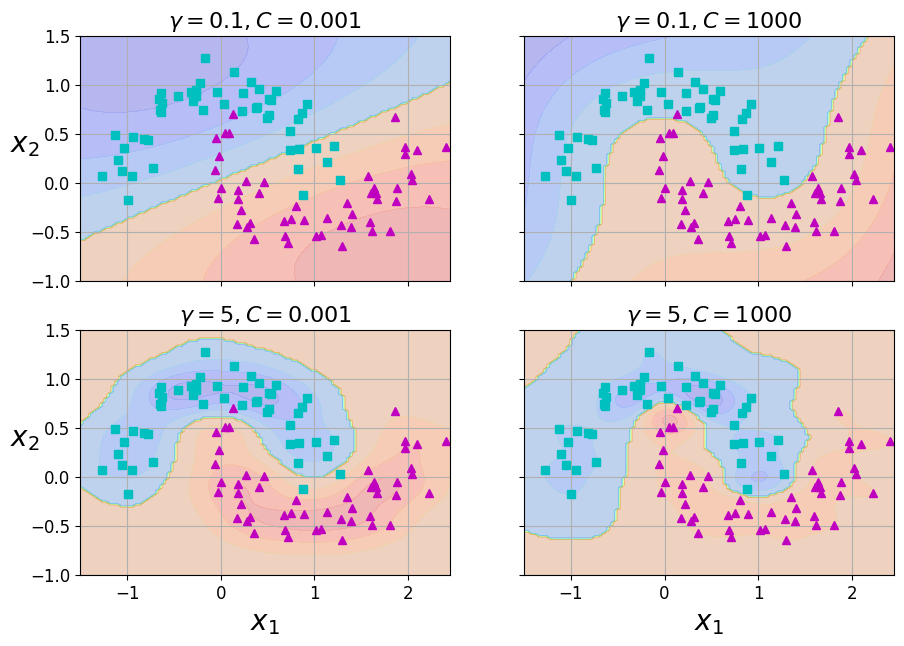

In [5]:
# Importing necessary modules
from sklearn.svm import SVC  # Importing Support Vector Classifier (SVC) for SVM classification

# Define different values for gamma and C
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

# Creating an empty list to store SVM classifiers
svm_clfs = []

# Looping over different combinations of gamma and C
for gamma, C in hyperparams:
    # Creating a pipeline for RBF Kernel SVM classifier with specific gamma and C
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),  # Step 1: Feature scaling using StandardScaler
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))  # Step 2: SVM classifier with RBF Kernel, gamma, and C
        ])
    # Fitting the classifier to the data
    rbf_kernel_svm_clf.fit(X, y)
    # Appending the trained classifier to the list
    svm_clfs.append(rbf_kernel_svm_clf)

# Creating subplots for visualizing the predictions of trained SVM classifiers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

# Looping over each SVM classifier and its corresponding subplot
for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])  # Selecting the subplot
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])  # Plotting predictions
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])  # Plotting dataset
    gamma, C = hyperparams[i]
    # Setting title with the specific gamma and C values
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    # Handling x-axis labels for the first row
    if i in (0, 1):
        plt.xlabel("")
    # Handling y-axis labels for the second row
    if i in (1, 3):
        plt.ylabel("")

# Displaying the plot
plt.show()
